In [24]:
import numpy as np
import pandas
from matplotlib import pyplot as plt

In [51]:
# import logged_in_data.json using pandas
df = pandas.read_csv('logged_in_data.csv')
# delete second column
df = df.drop(df.columns[1], axis=1)
# name columns with user, lastSignedInAt createdAt
df.columns = ['user', 'lastSignedInAt', 'createdAt']
# convert timestamp to date for columns lastSignedInAt and createdAt
df['lastSignedInAt'] = pandas.to_datetime(df['lastSignedInAt'], unit='ms')
df['createdAt'] = pandas.to_datetime(df['createdAt'], unit='ms')
# remove time from date and just save the date in new columns lastSignedInAtDate, createdAtDate
df['lastSignedInAtDate'] = df['lastSignedInAt'].dt.date
df['createdAtDate'] = df['createdAt'].dt.date
# add column that shows lastSignedInAtDay like Monday
df['lastSignedInAtDay'] = df['lastSignedInAt'].dt.day_name()
# sort by lastSignedInAt
df = df.sort_values(by=['lastSignedInAt'])
# export this df to csv named final_logged_data.csv
df.to_csv('final_logged_data.csv', index=False)
# print df data 
print(df)


                              user          lastSignedInAt  \
3030  NlcfZQB0hEgo0GKmqmuPDzOiFB22 2022-07-09 07:38:54.703   
2246  HyeKbpgbrmXw4DRlc9eQFmFYRVD2 2022-07-30 18:29:29.307   
4262  XSStyOylQ4MbIFMjf3VhjFPTnHI3 2022-07-30 18:31:05.439   
2003  G22jUH1PfAa57yWPEQd8v0RhyY32 2022-07-30 23:37:12.137   
3944  UthzZa3BnsPJrEfmx6FFcELwEuY2 2022-08-04 05:56:22.464   
...                            ...                     ...   
2164  HFn0Vq8fl2bTyRgf8uora3EbUOz1 2023-12-30 07:50:22.660   
7250  v2FxeC7d8WWGrKozREcRhOBPOK83 2023-12-30 08:29:11.052   
2385  IvB2Lie4tMdkeD5kLeaBRvw5i9f1 2023-12-30 08:32:03.283   
841   6jwN3NlFjiXKsi7ykU4Fhg38O8h1 2023-12-30 08:32:48.108   
2338  IeCNAXTyKWes1tP7lad9nTvmDMm1 2023-12-30 09:10:30.635   

                   createdAt lastSignedInAtDate createdAtDate  \
3030 2022-07-09 07:38:54.703         2022-07-09    2022-07-09   
2246 2022-07-30 18:29:29.307         2022-07-30    2022-07-30   
4262 2022-07-30 18:31:05.439         2022-07-30    2022-07-3

In [ ]:
def importFinalLoggedData():
    # import final_logged_data.csv
    return pandas.read_csv('final_logged_data.csv')
df = importFinalLoggedData()
# print df
print(df)

<Axes: xlabel='lastSignedInAtDate'>

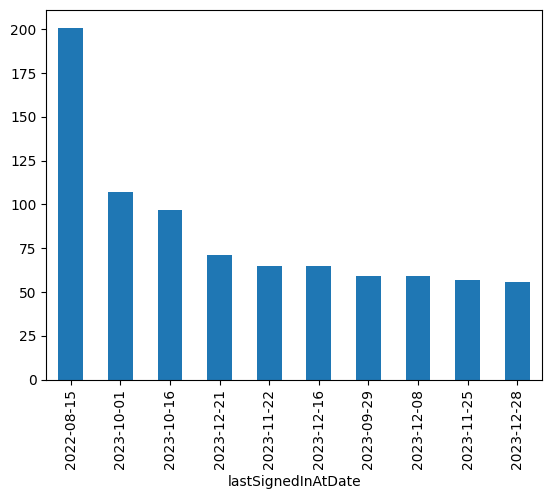

In [53]:
importFinalLoggedData()
# draw a graph that shows top 10 days that most users loggedin in a day 
# 1. group by date and count user
# 2. sort by count
# 3. get top 10
# 4. plot
# 5. save as png
df = df.groupby('lastSignedInAtDate').count()
df = df.sort_values(by=['user'], ascending=False)
df = df.head(10)
df['user'].plot(kind='bar')


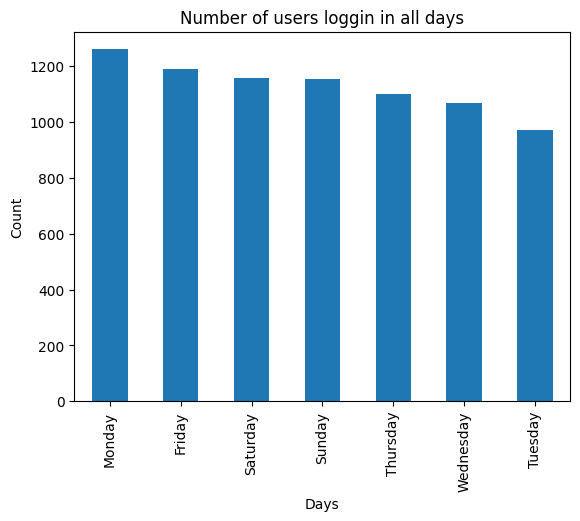

In [59]:
df = importFinalLoggedData()
# draw a graph that shows on number of users loggin in all days. Here day means Monday, Tuesday, etc..(use lastSignedInAtDay)
# x-axis should have the days and y axis should have count value
# 1. group by day and count user
# 2. sort by count
# 3. plot
# 4. save as png
df = df.groupby('lastSignedInAtDay').count()
df = df.sort_values(by=['user'], ascending=False)
df['user'].plot(kind='bar')
plt.xlabel("Days")
plt.ylabel("Count")
plt.title("Number of users loggin in all days")
plt.show()
